In [1]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)

1641221/1641221 [==============================] - 0s 0us/step


In [2]:
max([max(sequence) for sequence in train_data])

9999

In [19]:
reverse_word_index[1]

'the'

In [5]:
word_index['seriously']

612

In [6]:
reverse_word_index[612]

'seriously'

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [23]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [25]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 90ms/step - loss: 0.5184 - accuracy: 0.7773 - val_loss: 0.3874 - val_accuracy: 0.8674
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3168 - accuracy: 0.8960 - val_loss: 0.3078 - val_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2374 - accuracy: 0.9204 - val_loss: 0.2946 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1949 - accuracy: 0.9361 - val_loss: 0.2729 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1638 - accuracy: 0.9453 - val_loss: 0.2804 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1361 - accuracy: 0.9571 - val_loss: 0.3161 - val_accuracy: 0.8739
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1192 - accuracy: 0.9628 - val_loss: 0.2934 - val_accuracy: 0.8860
Epoch 8/20
30

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

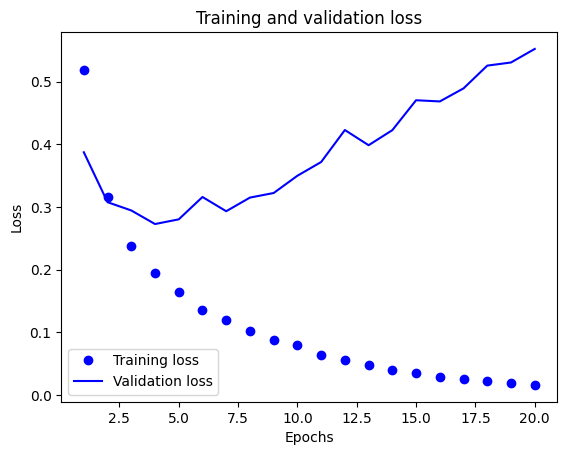

In [29]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

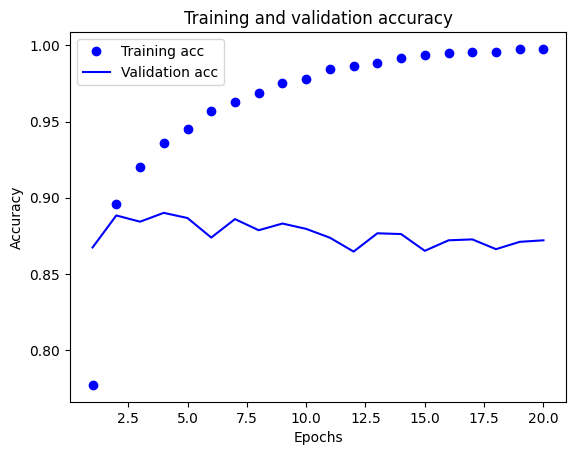

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## HW1

In [41]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1, activation="sigmoid")
])

In [42]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 79ms/step - loss: 0.6180 - accuracy: 0.7473 - val_loss: 0.5640 - val_accuracy: 0.8143
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5196 - accuracy: 0.8447 - val_loss: 0.5012 - val_accuracy: 0.8336
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4585 - accuracy: 0.8681 - val_loss: 0.4546 - val_accuracy: 0.8542
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4130 - accuracy: 0.8813 - val_loss: 0.4208 - val_accuracy: 0.8619
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3776 - accuracy: 0.8910 - val_loss: 0.3948 - val_accuracy: 0.8682
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3496 - accuracy: 0.8991 - val_loss: 0.3743 - val_accuracy: 0.8734
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3265 - accuracy: 0.9065 - val_loss: 0.3583 - val_accuracy: 0.8758
Epoch 8/20
30

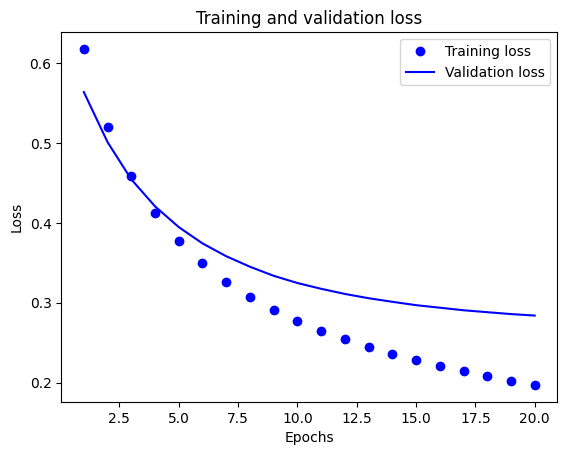

In [44]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

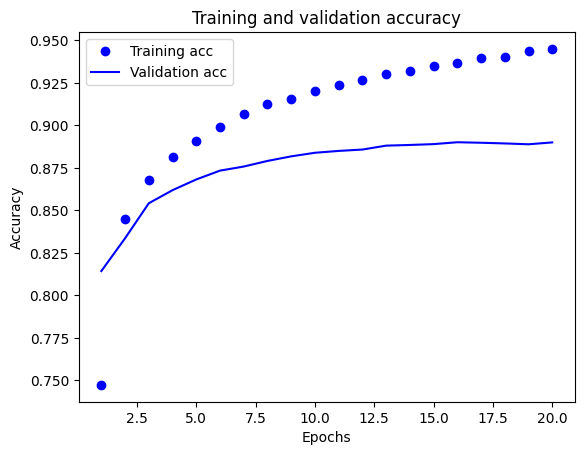

In [45]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Reuters Data

In [46]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [47]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [48]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [49]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [50]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [51]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [52]:
# sparse crossentrophy(0~45 원래 label로 사용하겠다) vs categorical crossentrophy(원 핫 인코딩)
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [53]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [54]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 35ms/step - loss: 2.5287 - accuracy: 0.5243 - val_loss: 1.7249 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4753 - accuracy: 0.6865 - val_loss: 1.3570 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1598 - accuracy: 0.7415 - val_loss: 1.1849 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9503 - accuracy: 0.7969 - val_loss: 1.1172 - val_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7965 - accuracy: 0.8267 - val_loss: 1.0237 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6640 - accuracy: 0.8543 - val_loss: 0.9803 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5635 - accuracy: 0.8758 - val_loss: 0.9779 - val_accuracy: 0.7920
Epoch 8/20
16

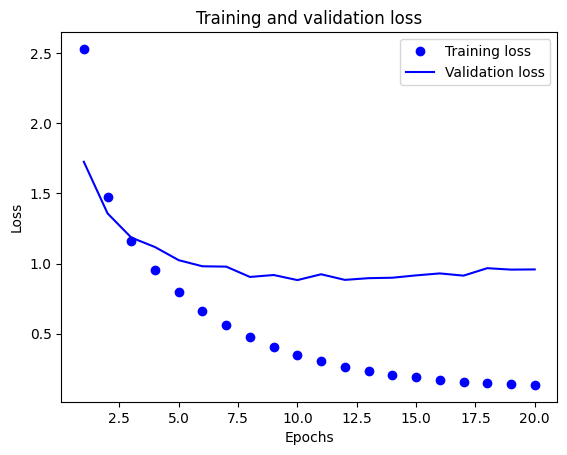

In [55]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

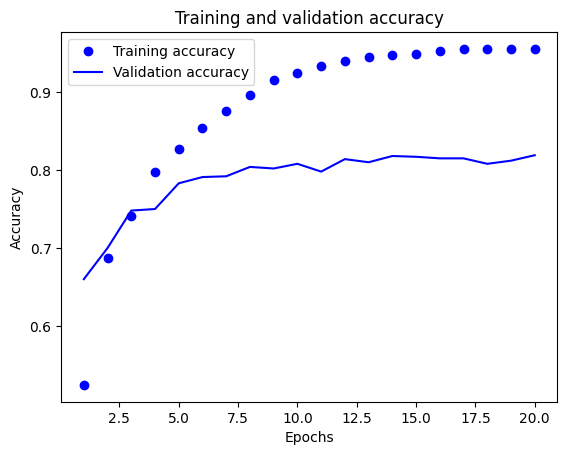

In [56]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 2.6421 - accuracy: 0.4629
Epoch 2/9
18/18 [==============================] - 0s 15ms/step - loss: 1.5301 - accuracy: 0.6691
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 1.1642 - accuracy: 0.7413
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.9342 - accuracy: 0.7945
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7593 - accuracy: 0.8376
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6246 - accuracy: 0.8684
Epoch 7/9
18/18 [==============================] - 0s 17ms/step - loss: 0.5193 - accuracy: 0.8901
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.4326 - accuracy: 0.9085
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9114 - accuracy: 0.7934


In [58]:
results

[0.911370038986206, 0.7934104800224304]

In [59]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.20525378450578807

In [65]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [66]:
predictions.shape

(2246, 46)

In [67]:
np.sum(predictions[0])

1.0000002

In [68]:
np.argmax(predictions[0])

3

### 레이블과 손실 다루는 법

In [73]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [74]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [75]:
y_val[:6]

array([3, 4, 3, 4, 4, 4])

In [70]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [81]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 3.2866 - accuracy: 0.0614 - val_loss: 2.8583 - val_accuracy: 0.0590
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 2.3996 - accuracy: 0.3326 - val_loss: 2.0922 - val_accuracy: 0.4100
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.8731 - accuracy: 0.4366 - val_loss: 1.8278 - val_accuracy: 0.4250
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6609 - accuracy: 0.4548 - val_loss: 1.6845 - val_accuracy: 0.4560
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4869 - accuracy: 0.5492 - val_loss: 1.5580 - val_accuracy: 0.6280
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3232 - accuracy: 0.6793 - val_loss: 1.4451 - val_accuracy: 0.6510
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2029 - accuracy: 0.6947 - val_loss: 1.4056 - val_accuracy: 0.6530
Epoch 8/20
63/63 [=

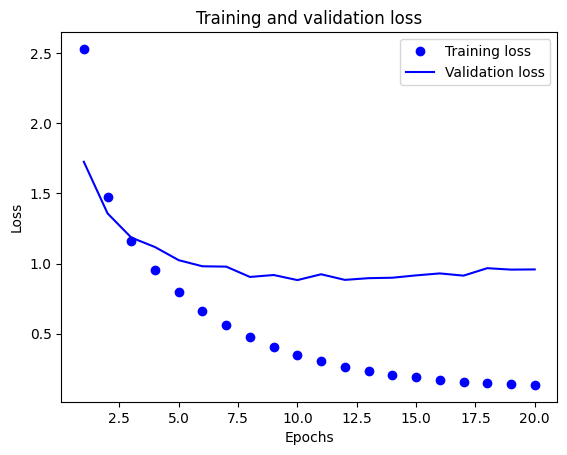

In [79]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

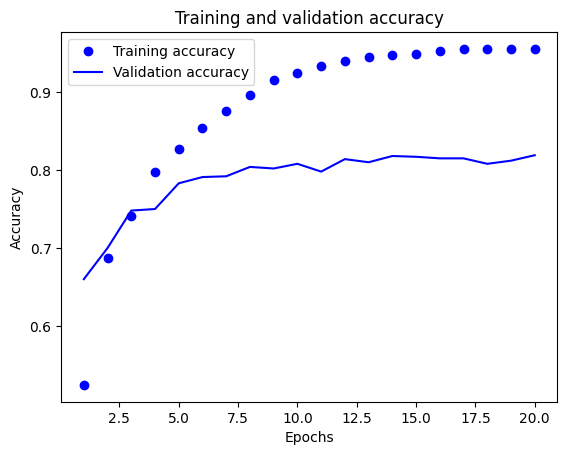

In [80]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Boston House Prices

In [82]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


데이터 정규화

In [83]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [84]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [87]:
# 문제점 : history가 없어서 overfitting 알 수 없음
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [88]:
all_scores

[2.081127405166626, 2.7043027877807617, 2.3949482440948486, 2.432663917541504]

In [89]:
np.mean(all_scores)

2.403260588645935

In [90]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=100, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [97]:
all_mae_histories[0][:10]

[20.452911376953125,
 19.760360717773438,
 19.056657791137695,
 18.34720802307129,
 17.591760635375977,
 16.73165512084961,
 15.796219825744629,
 14.940465927124023,
 14.022063255310059,
 12.951203346252441]

In [91]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [98]:
average_mae_history[:10]

[21.170875072479248,
 20.515573978424072,
 19.81928253173828,
 19.12589931488037,
 18.391582489013672,
 17.576523780822754,
 16.73431897163391,
 15.820172786712646,
 14.868955135345459,
 13.930504560470581]

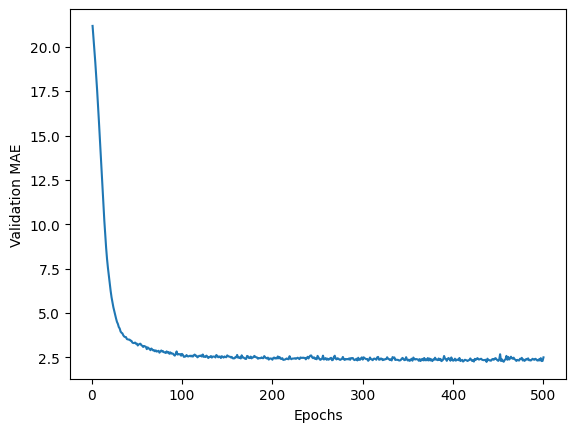

In [92]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

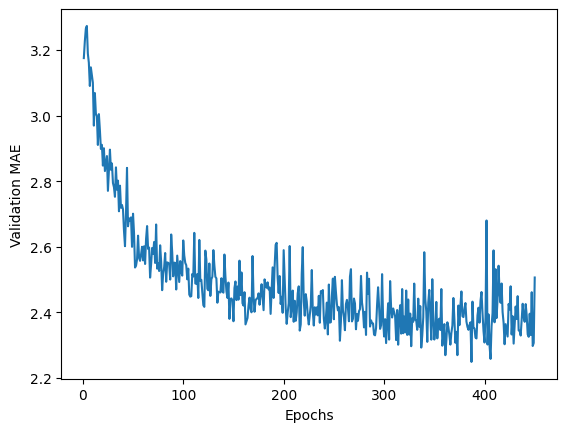

In [95]:
truncated_mae_history = average_mae_history[50:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [99]:
#model = build_model()
#model.fit(train_data, train_targets,
#          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 20.1165 - mae: 2.7511


In [100]:
test_mae_score

2.7511138916015625

In [101]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([9.007417], dtype=float32)

In [102]:
test_targets[0]

7.2

### Try using one or three hidden layers, and see how doing so affects validation and test accuracy

### Try using layers with more hidden units or fewer hidden units

### Try using the mse loss function instead of binary_crossentropy

### Try using the tanh activation instead of relu

### Without Dense layers it is exactly a logistic regression, try this, study logistic regression, and compare

### Try using larger or smaller layers

### Try using a single hidden layer, or three hidden layers

### Try Varying the number of layers in the model

### Try Varying the number of units per layer